In [28]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import math

Zwizualizuj dane

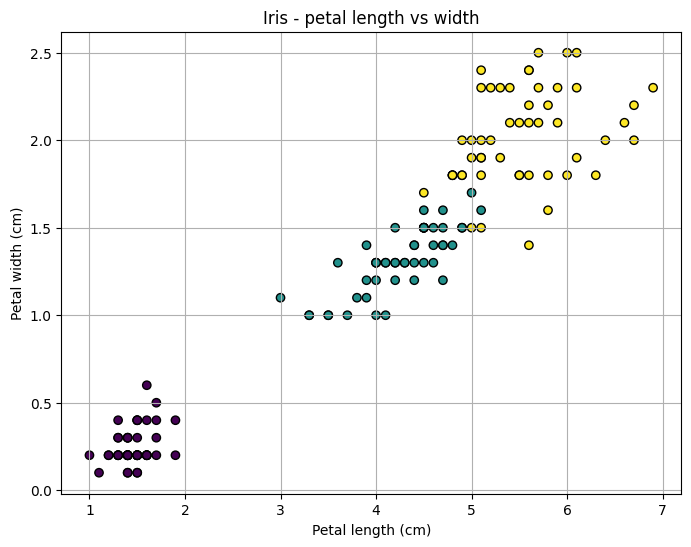

In [29]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 3], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Iris - petal length vs width')
plt.grid(True)
plt.show()

Sprawdź, który z podziałów jest lepszy w przypadku miary entropii:

a) petal width (cm)na poziomie: 0.5

b) petal width (cm)na poziomie: 0.38

Podaj zysk informacyjny na każdym z podziałów


In [30]:
def entropy(y_subset):
    _, counts = np.unique(y_subset, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum([p * math.log2(p) for p in probs if p > 0])

def info_gain(X, y, threshold):
    parent_entropy = entropy(y)

    left_mask = X <= threshold
    right_mask = X > threshold

    n = len(y)
    n_left = np.sum(left_mask)
    n_right = np.sum(right_mask)

    if n_left == 0 or n_right == 0:
        return 0

    child_entropy = (n_left / n) * entropy(y[left_mask]) + (n_right / n) * entropy(y[right_mask])

    gain = parent_entropy - child_entropy
    return gain

petal_width = X[:, 3]
gain_15 = info_gain(petal_width, y, 1.5)
gain_038 = info_gain(petal_width, y, 0.38)

print(f"Zysk informacyjny dla podziału na 1.5: {gain_15}")
print(f"Zysk informacyjny dla podziału na 0.38: {gain_038}")

Zysk informacyjny dla podziału na 1.5: 0.6655756524704468
Zysk informacyjny dla podziału na 0.38: 0.6195148513196114


Zaimplementuj drzewo decyzyjne i las losowy (złożony z 15 drzew); przetestuj na 30% zbiorze testowym

sklearn.ensemble.RandomForestClassifier

sklearn.tree.DecisionTreeClassifier

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)

forest_clf = RandomForestClassifier(n_estimators=15, random_state=42)
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)
acc_forest = accuracy_score(y_test, y_pred_forest)

print(f"Dokładność - Drzewo decyzyjne: {acc_tree}")
print(f"Dokładność - Las losowy (15 drzew): {acc_forest}")

print()

print("random_state 0–4:")
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)
    acc_tree = accuracy_score(y_test, tree_clf.predict(X_test))

    forest_clf = RandomForestClassifier(n_estimators=15, random_state=42)
    forest_clf.fit(X_train, y_train)
    acc_forest = accuracy_score(y_test, forest_clf.predict(X_test))

    print(f"Podział {i}: Drzewo = {acc_tree}, Las = {acc_forest}")

Dokładność - Drzewo decyzyjne: 1.0
Dokładność - Las losowy (15 drzew): 1.0

random_state 0–4:
Podział 0: Drzewo = 0.9777777777777777, Las = 0.9777777777777777
Podział 1: Drzewo = 0.9555555555555556, Las = 0.9555555555555556
Podział 2: Drzewo = 0.9555555555555556, Las = 0.9555555555555556
Podział 3: Drzewo = 0.9111111111111111, Las = 0.9555555555555556
Podział 4: Drzewo = 0.9777777777777777, Las = 0.9555555555555556
